# PCA - Princple component analysis for feature reduction

https://medium.com/@sebastiannorena/pca-principal-components-analysis-applied-to-images-of-faces-d2fc2c083371

https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/

https://casey.li/pca/ #uitleg 

https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

https://towardsdatascience.com/principal-component-analysis-in-depth-understanding-through-image-visualization-892922f77d9f

64 x 64 x 3 = 12288 features \
64 x 64 x 1 = 4069 features  grayscale \  
112 x 112 x 3 = 37.632 features \
224 x 224 x 3 = 150.528 features \


In [3]:
from sklearn import decomposition
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import scipy
import pandas as pd
%matplotlib inline

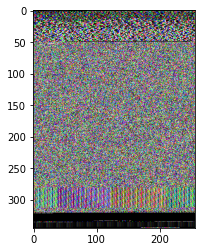

In [4]:
#Example of a cerbersample - no reshaping
from PIL import Image
file = '/home/labuser/deeplearning/thesis/datasets/processed/test/cerber/fc3a2587aaecb74160fa76217ba5bd9b5ed17e86dee34919f1354f806c8bc449.png'
pil_im = Image.open(file)
im_array = np.asarray(pil_im)
plt.imshow(im_array)
plt.show()

In [5]:
# size of the image
width, height = pil_im.size 
width, height

(256, 345)

In [17]:
pil_im.mode

'RGB'

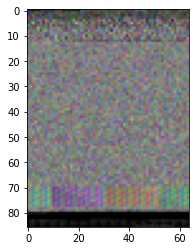

In [6]:
#Show image resolution 64 with aspectratio fixed
basewidth = 64
img = Image.open(file)
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
pil_img = img.resize((basewidth, hsize), Image.ANTIALIAS)
im_array = np.asarray(pil_img)
plt.imshow(im_array)
plt.show()

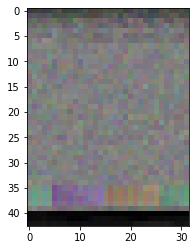

In [7]:
basewidth = 32
img = Image.open(file)
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
pil_img = img.resize((basewidth, hsize), Image.ANTIALIAS)
im_array = np.asarray(pil_img)
plt.imshow(im_array)
plt.show()

In [ ]:
#run preprare for PCA script on all images and resized 112 x 112

# Images converted to a 112x112x1 array

All samples form the VT data trainingset

In [11]:
samples = pd.read_pickle('/home/labuser/deeplearning/thesis/datamanagement/dataman/pca/prepeareforpca.pkl')

In [12]:
samples.head()

,0,1,2,3,4,5,6,7,8,9,...,37622,37623,37624,37625,37626,37627,37628,37629,37630,37631
/home/labuser/deeplearning/thesis/datasets/preprocessed/genasom/57c2de8cb9677a4859f444d3d104249b1e6aac71392e75f416676c733656a68a.png,181.0,160.0,161.0,166.0,164.0,159.0,157.0,151.0,170.0,154.0,...,71.0,74.0,74.0,74.0,76.0,77.0,76.0,74.0,69.0,76.0
/home/labuser/deeplearning/thesis/datasets/preprocessed/genasom/72faf111c158b2549ba8d6e871bee885bc003b889097eb7b08004e67add376e1.png,168.0,161.0,179.0,164.0,169.0,168.0,165.0,151.0,160.0,158.0,...,90.0,90.0,90.0,90.0,78.0,77.0,78.0,80.0,77.0,74.0
/home/labuser/deeplearning/thesis/datasets/preprocessed/genasom/100d819ed52994bfa6268b377ce479ca2979c16f1d68d1386453483e05dd4c8e.png,182.0,186.0,181.0,177.0,183.0,184.0,183.0,186.0,183.0,183.0,...,81.0,75.0,74.0,73.0,73.0,75.0,76.0,79.0,78.0,79.0
/home/labuser/deeplearning/thesis/datasets/preprocessed/genasom/148cc9d59488883e117a85e30e65f87bd857d6b0f7d1a11569eb9b584dd870d5.png,179.0,173.0,184.0,167.0,157.0,173.0,160.0,155.0,164.0,180.0,...,76.0,79.0,79.0,77.0,81.0,82.0,79.0,77.0,81.0,81.0
/home/labuser/deeplearning/thesis/datasets/preprocessed/genasom/6ea85838526f25b4ab0519f09a1928f17c2e9472e4d9d680d7649d880863f513.png,166.0,169.0,158.0,171.0,172.0,161.0,154.0,158.0,157.0,158.0,...,68.0,68.0,64.0,63.0,59.0,61.0,61.0,66.0,65.0,61.0


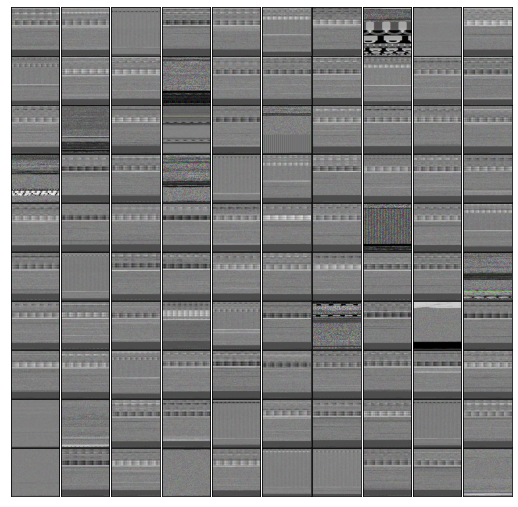

In [13]:
#show the images 10x10 = 100 grayscale
fig, axes = plt.subplots(10,10,figsize=(9,9),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(np.uint8(samples.iloc[i].values.reshape(112,112,3)))

# PCA - eigenvectors

0        46.877121
1        46.199940
2        44.701275
3        47.463142
4        45.229353
           ...    
37627    37.009461
37628    37.880193
37629    37.301333
37630    36.980399
37631    37.407945
Length: 37632, dtype: float64
(6310, 37632)
298


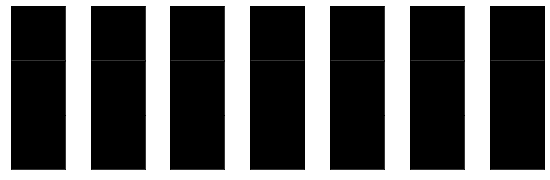

In [14]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
samples_pca = PCA(n_components=0.8)
samples_pca.fit(samples)
pca_std = np.std(samples)
print(pca_std)
print(samples.shape)

print(samples_pca.n_components_)
samples_pca.explained_variance_ratio_.sum()
fig, axes = plt.subplots(3,7,figsize=(10,3),
 subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(np.uint8(samples_pca.components_[i].reshape(112,112,3)))


In [15]:
samples_pca.explained_variance_ratio_.sum()

0.800045092145154

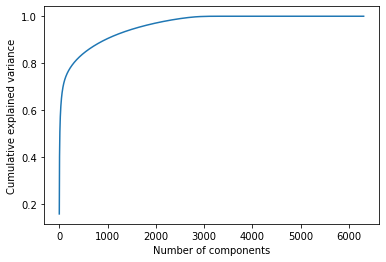

In [24]:
#
pca = PCA()
pca.fit(samples)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

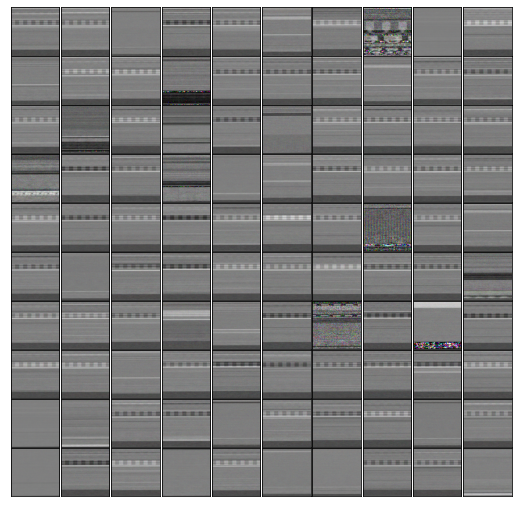

In [26]:
components = samples_pca.transform(samples)
projected = samples_pca.inverse_transform(components)
fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.uint8(projected[i].reshape(112,112,3)),cmap="gray")

# Inverse 

In [27]:
inv_pca = pca.inverse_transform(components)
inv_sc = scaler.inverse_transform(inv_pca)

ValueError: shapes (6310,298) and (6310,37632) not aligned: 298 (dim 1) != 6310 (dim 0)

In [ ]:
def side_by_side(indexes):
    org = x[indexes].reshape(112,112)
    rec = inv_sc[indexes].reshape(112,112)
    pair = np.concatenate((org, rec), axis=1)
    plt.figure(figsize=(4,2))
    plt.imshow(pair)
    plt.show()
 
#10 items a in the data set
for index in range(0,10):
    side_by_side(index)

In [ ]:
You can load the CIFAR - 10 dataset using a deep learning library called Keras.

from keras.datasets import cifar10
Once imported, you will use the .load_data() method to download the data, it will download and store the data in your Keras directory. This can take some time based on your internet speed.

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
The above line of code returns training and test images along with the labels.

Let's quickly print the shape of training and testing images shape.

print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)
Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Let's also print the shape of the labels.

y_train.shape,y_test.shape
((50000, 1), (10000, 1))
Let's also find out the total number of labels and the various kinds of classes the data has.

# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
Now to plot the CIFAR-10 images, you will import matplotlib and also use a magic (%) command %matplotlib inline to tell the jupyter notebook to show the output within the notebook itself!

import matplotlib.pyplot as plt
%matplotlib inline
For a better understanding, let's create a dictionary that will have class names with their corresponding categorical class labels.

label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))
Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')

Even though the above two images are blurry, you can still somehow observe that the first image is a frog with the label frog, while the second image is of a cat with the label cat.

Data Visualization using PCA
Now comes the most exciting part of this tutorial. As you learned earlier that PCA projects turn high-dimensional data into a low-dimensional principal component, now is the time to visualize that with the help of Python!

serve that the two classes benign and malignant, when projected to a two-dimensional space, can be linearly separable up to some extent. Other observations can be that the benign class is spread out as compared to the malignant class.

Visualizing the CIFAR - 10 data
The following lines of code for visualizing the CIFAR-10 data is pretty similar to the PCA visualization of the Breast Cancer data.

Let's quickly check the maximum and minimum values of the CIFAR-10 training images and normalize the pixels between 0 and 1 inclusive.
np.min(x_train),np.max(x_train)
(0.0, 1.0)
x_train = x_train/255.0
np.min(x_train),np.max(x_train)
(0.0, 0.00392156862745098)
x_train.shape
(50000, 32, 32, 3)
Next, you will create a DataFrame that will hold the pixel values of the images along with their respective labels in a row-column format.

But before that, let's reshape the image dimensions from three to one (flatten the images).

x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))
Size of the dataframe: (50000, 3073)
Perfect! The size of the dataframe is correct since there are 50,000 training images, each having 3072 pixels and an additional column for labels so in total 3073.

PCA will be applied on all the columns except the last one, which is the label for each image.

df_cifar.head()
pixel0	pixel1	pixel2	pixel3	pixel4	pixel5	pixel6	pixel7	pixel8	pixel9	...	pixel3063	pixel3064	pixel3065	pixel3066	pixel3067	pixel3068	pixel3069	pixel3070	pixel3071	label
0	0.231373	0.243137	0.247059	0.168627	0.180392	0.176471	0.196078	0.188235	0.168627	0.266667	...	0.847059	0.721569	0.549020	0.592157	0.462745	0.329412	0.482353	0.360784	0.282353	6
1	0.603922	0.694118	0.733333	0.494118	0.537255	0.533333	0.411765	0.407843	0.372549	0.400000	...	0.560784	0.521569	0.545098	0.560784	0.525490	0.556863	0.560784	0.521569	0.564706	9
2	1.000000	1.000000	1.000000	0.992157	0.992157	0.992157	0.992157	0.992157	0.992157	0.992157	...	0.305882	0.333333	0.325490	0.309804	0.333333	0.325490	0.313725	0.337255	0.329412	9
3	0.109804	0.098039	0.039216	0.145098	0.133333	0.074510	0.149020	0.137255	0.078431	0.164706	...	0.211765	0.184314	0.109804	0.247059	0.219608	0.145098	0.282353	0.254902	0.180392	4
4	0.666667	0.705882	0.776471	0.658824	0.698039	0.768627	0.694118	0.725490	0.796078	0.717647	...	0.294118	0.309804	0.321569	0.278431	0.294118	0.305882	0.286275	0.301961	0.313725	1
5 rows × 3073 columns

Next, you will create the PCA method and pass the number of components as two and apply fit_transform on the training data, this can take few seconds since there are 50,000 samples
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])
Then you will convert the principal components for each of the 50,000 images from a numpy array to a pandas DataFrame.

principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

In [23]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=samples,
    legend="full",
    alpha=0.3
)

ValueError: Could not interpret input 'principal component 1'

<Figure size 1152x720 with 0 Axes>